<a href="https://colab.research.google.com/github/haebarassi/dl-lecture/blob/master/AboutPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
- https://dandyrilla.github.io/2017-08-12/pandas-10min/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 오브젝트 생성하기

- 데이터 오브젝트 : 데이터를 담고 있는 그릇
  - pandas에서는 어떤 그릇(데이터 오브젝트)을 주로 사용할까?
    - Series : 1차원 배열
    - DataFrame : 2차원 배열

In [ ]:
# data object 만들어보자.

In [ ]:
# (1) Series
s = pd.Series([1,2,3,np.nan,5,6])

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

In [ ]:
s.items

<bound method Series.items of 0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64>

In [ ]:
for index, value in s.items():
  print(f"index: {index}, Value:{value}")

index: 0, Value:1.0
index: 1, Value:2.0
index: 2, Value:3.0
index: 3, Value:nan
index: 4, Value:5.0
index: 5, Value:6.0


In [ ]:
# (2) DataFrame
# 
# 2차원 배열을 담고 있기 때문에 두가지 기준에 따라 데이터가 담긴다. 
# 첫번째 기준은 행에 해당하는 index,
# 두번째 기준은 열에 해당하는 columns

dates = pd.date_range('20220308', periods=6)
# print(dates)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [ ]:
# df = pd.DataFrame(data, index, columns, dtype, copy)
# data: DataFrame을 생성할 데이터
# index: 각 row에 대해 label 추가 (옵션)
# columns: 각 Column에 대해 label 추가 (옵션)
# dtype: 각 Column의 데이터타입 명시 (옵션)

In [ ]:
# numpy를 이용해 DataFrame 생성해보자
data = np.array([[1,2,3],[4,5,6]])
df = pd.DataFrame(data, columns=['col1','col2','col3'])
print(df)

   col1  col2  col3
0     1     2     3
1     4     5     6


In [ ]:
df.items

<bound method DataFrame.items of    col1  col2  col3
0     1     2     3
1     4     5     6>

In [ ]:
for label, content in df.items():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')

label: col1
content: 0    1
1    4
Name: col1, dtype: int64
label: col2
content: 0    2
1    5
Name: col2, dtype: int64
label: col3
content: 0    3
1    6
Name: col3, dtype: int64


In [ ]:
#data = [['sieun',24],['dahae',21],['soyoung',20]]
data = [['sieun',24]]
df = pd.DataFrame(data, columns=['Name','Age'])

print(df)


    Name  Age
0  sieun   24


In [ ]:
df2 = pd.DataFrame({'A':1,
                    'B':pd.Timestamp('20220308'),
                    'C': pd.Series(1,index=list(range(4)),dtype='float32')})
# print(df2)
# df2.dtypes        # <- dataframe의 컬럼들은 각기 특별한 자료형을 가질 수 있다.

## 데이터 확인하기

In [ ]:
df.index

DatetimeIndex(['2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-12', '2022-03-13'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[-1.67099104, -0.00691911,  0.2912937 , -0.25511162],
       [ 0.03332899, -0.35299291, -0.234868  ,  1.66203218],
       [-0.71370608,  0.18221475, -0.84383214,  1.32161762],
       [-0.39158436,  0.39570152, -0.09087871, -1.3540169 ],
       [ 0.646996  ,  0.87415572, -0.12708215, -1.46081832],
       [-0.11038715, -0.46539849,  0.78372467,  0.25622774]])

In [ ]:
df.describe() # 통계정보

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.367724,0.104460,-0.036940,0.028322
std,0.784283,0.495925,0.544521,1.311663
min,-1.670991,-0.465398,-0.843832,-1.460818
25%,-0.633176,-0.266474,-0.207922,-1.079291
50%,-0.250986,0.087648,-0.108980,0.000558
75%,-0.002600,0.342330,0.195751,1.055270
max,0.646996,0.874156,0.783725,1.662032


In [ ]:
df.T      # 행과 열을 바꿔준다.

,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13
A,-1.670991,0.033329,-0.713706,-0.391584,0.646996,-0.110387
B,-0.006919,-0.352993,0.182215,0.395702,0.874156,-0.465398
C,0.291294,-0.234868,-0.843832,-0.090879,-0.127082,0.783725
D,-0.255112,1.662032,1.321618,-1.354017,-1.460818,0.256228


In [ ]:
df.sort_index(axis=1, ascending = False) 

# axis는 정렬할 대상 축
# ascending: 오름차순(True)/내림차순(False)

,D,C,B,A
2022-03-08,-0.255112,0.291294,-0.006919,-1.670991
2022-03-09,1.662032,-0.234868,-0.352993,0.033329
2022-03-10,1.321618,-0.843832,0.182215,-0.713706
2022-03-11,-1.354017,-0.090879,0.395702,-0.391584
2022-03-12,-1.460818,-0.127082,0.874156,0.646996
2022-03-13,0.256228,0.783725,-0.465398,-0.110387


In [ ]:
df.sort_values(by='B')    # 내부 값으로 정렬 가능 (B값을 기준으로 정렬)

,A,B,C,D
2022-03-13,-0.110387,-0.465398,0.783725,0.256228
2022-03-09,0.033329,-0.352993,-0.234868,1.662032
2022-03-08,-1.670991,-0.006919,0.291294,-0.255112
2022-03-10,-0.713706,0.182215,-0.843832,1.321618
2022-03-11,-0.391584,0.395702,-0.090879,-1.354017
2022-03-12,0.646996,0.874156,-0.127082,-1.460818


## 데이터 선택하기

#### 컬럼 명을 이용하여 선택하기

In [ ]:
# by < slicing >
df['A']   # 'A'라는 이름을 가진 컬럼의 데이터 가져오기

2022-03-08   -1.670991
2022-03-09    0.033329
2022-03-10   -0.713706
2022-03-11   -0.391584
2022-03-12    0.646996
2022-03-13   -0.110387
Freq: D, Name: A, dtype: float64

In [ ]:
df.A

2022-03-08   -1.670991
2022-03-09    0.033329
2022-03-10   -0.713706
2022-03-11   -0.391584
2022-03-12    0.646996
2022-03-13   -0.110387
Freq: D, Name: A, dtype: float64

#### 행을 기준으로 선택하기

In [ ]:
# slicing
# 값 하나만 입력하면 컬럼 기준으로 출력하므로
# 행 기준으로 출력하고 싶다면 항상 '범위'를 알려줘야한다.
df[0:3]     # 0,1,2번째 행을 가지고 온다.

,A,B,C,D
2022-03-08,-1.670991,-0.006919,0.291294,-0.255112
2022-03-09,0.033329,-0.352993,-0.234868,1.662032
2022-03-10,-0.713706,0.182215,-0.843832,1.321618


In [ ]:
df['20220308':'20220311']  # 입력한 앞 인덱스 행에서 뒤 인덱스 행까지 (뒤에 있는 인덱스 행의 데이터 포함)

,A,B,C,D
2022-03-08,-1.670991,-0.006919,0.291294,-0.255112
2022-03-09,0.033329,-0.352993,-0.234868,1.662032
2022-03-10,-0.713706,0.182215,-0.843832,1.321618
2022-03-11,-0.391584,0.395702,-0.090879,-1.354017


#### 이름으로 선택하기

In [ ]:
df.loc[dates[0]]

A   -1.670991
B   -0.006919
C    0.291294
D   -0.255112
Name: 2022-03-08 00:00:00, dtype: float64

In [ ]:
df.loc['20220308']

A   -1.670991
B   -0.006919
C    0.291294
D   -0.255112
Name: 2022-03-08 00:00:00, dtype: float64

#### 위치를 이용하여 선택  .iloc

#### 조건을 이용하여 선택

## 데이터 변경하기

#### 새로운 열 추가

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['E'] = s1

#### 특정 값 하나 선택하여 다른값으로 바꾸기

In [ ]:
df.at[dates[0],'A'] = 0

In [ ]:
df.iat[0,1] = 0

#### 여러 값 한꺼번에 바꾸기

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))

In [ ]:
df

,A,B,C,D,E
2022-03-08,0.000000,NaN,0.291294,5,NaN
2022-03-09,0.033329,NaN,-0.234868,5,NaN
2022-03-10,-0.713706,NaN,-0.843832,5,NaN
2022-03-11,-0.391584,NaN,-0.090879,5,NaN
2022-03-12,0.646996,NaN,-0.127082,5,NaN
2022-03-13,-0.110387,NaN,0.783725,5,NaN


## 연산

## merging

In [ ]:
# concat

In [ ]:
# merge

In [ ]:
# append

## 묶기 Grouping

In [ ]:
# Splitting
# 어떠한 기준을 바탕으로 데이터를 나누는 일

In [ ]:
# Applying
#  각 그룹에 어떤 함수를 독립적으로 적용시키는 일

In [ ]:
# combining
# 적용되어 나온 결과들을 통합하는 일

## 변형하기 Reshaping

## 시계열 데이터 다루기 Time Series

## Categoriclas 범주형 데이터 다루기

## 그래프로 표현하기 Plotting

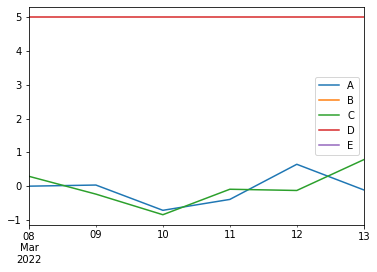

In [ ]:
df.plot()

## 데이터 입출력